# Forest Fires : Prediction of Forest Fires using the demographic and weather data of a forest.

## Forest ﬁre prediction constitutes a signiﬁcant com-ponent of forest ﬁre management. It plays a significant role in resource allocation, mitigation, and recovery efforts. 
## Here below, I have visualized the effects of variation of a particular feature on forest fire and compared the loss of different models after training them.

In [79]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Loading the dataset

In [80]:
forest_fires = pd.read_csv('forest_fires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Converting the labels under month and day to integers

In [81]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [82]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Corelation analysis for the dataset

In [83]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


### Extracting features from the dataset

In [84]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [85]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [86]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [87]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Histogram plotting function for dataset

In [88]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

### Scatter plot for the locations

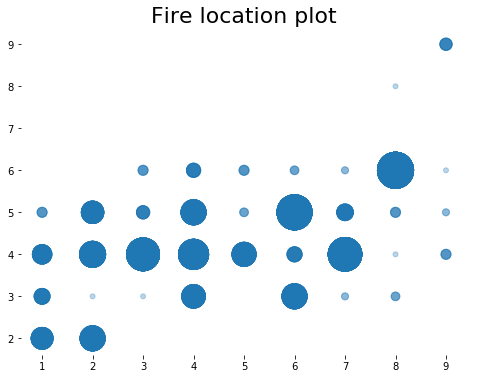

In [89]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

### Plotting the distribution of values for the dataset

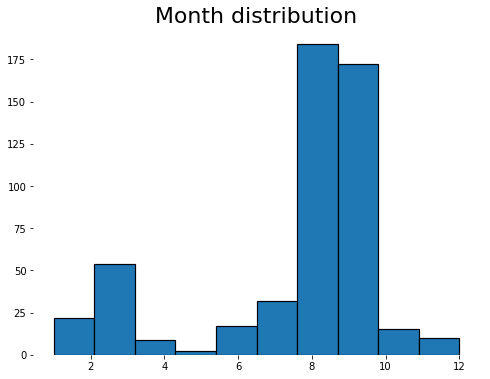

In [90]:
histogram_plot(month_values, title = "Month distribution")
plt.show()

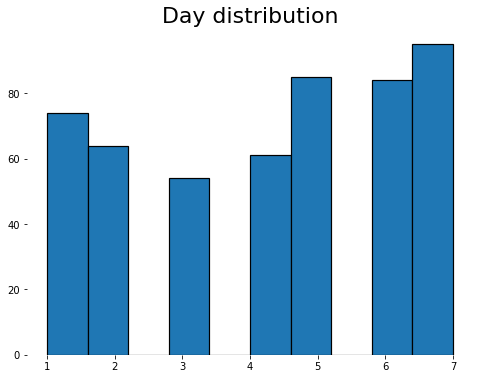

In [91]:
histogram_plot(day_values, title = "Day distribution")
plt.show()

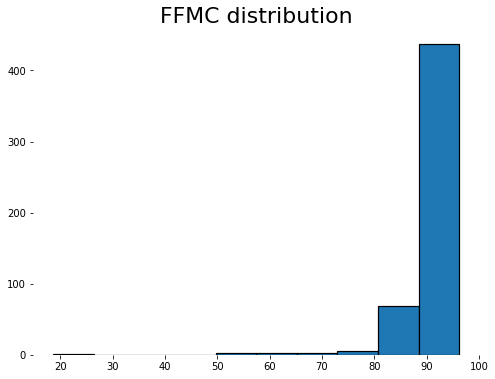

In [92]:
histogram_plot(ffmc_values, title = "FFMC distribution")
plt.show()

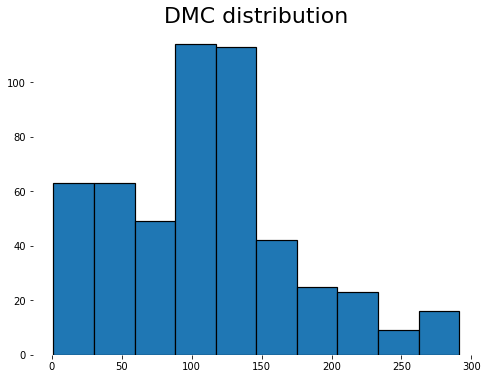

In [93]:
histogram_plot(dmc_values, title = "DMC distribution")
plt.show()

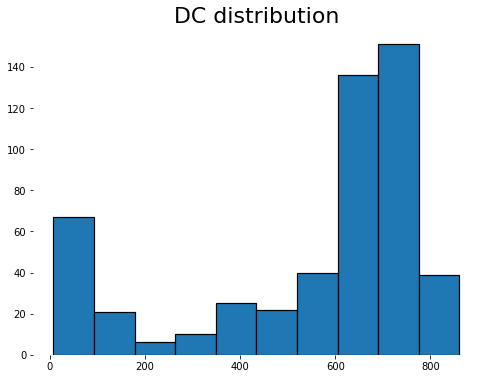

In [94]:
histogram_plot(dc_values, title = "DC distribution")
plt.show()

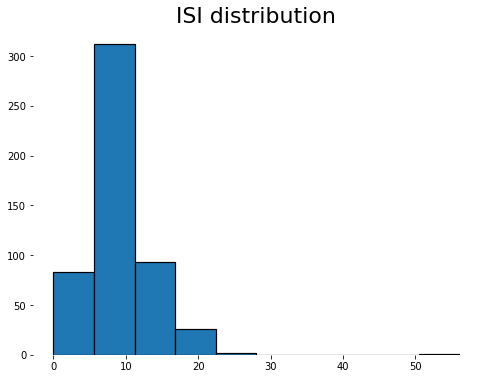

In [95]:
histogram_plot(isi_values, title = "ISI distribution")
plt.show()

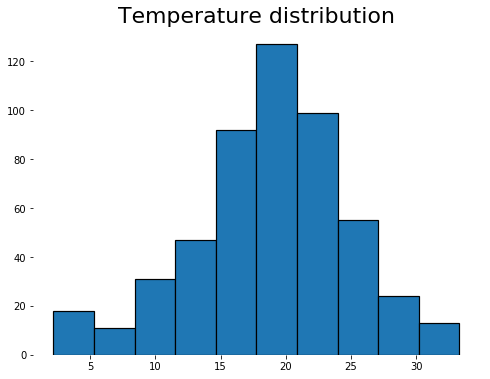

In [96]:
histogram_plot(temp_values, title = "Temperature distribution")
plt.show()

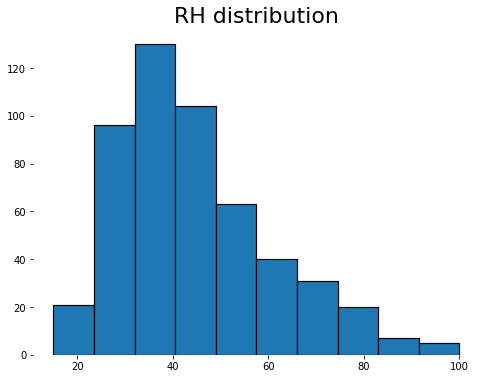

In [97]:
histogram_plot(rh_values, title = "RH distribution")
plt.show()

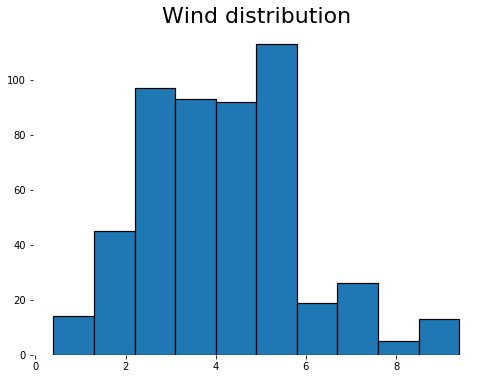

In [98]:
histogram_plot(wind_values, title = "Wind distribution")
plt.show()

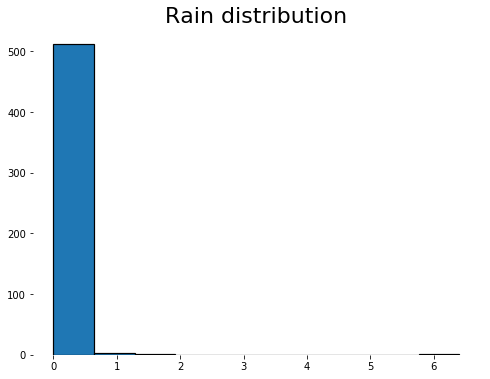

In [99]:
histogram_plot(rain_values, title = "Rain distribution")
plt.show()

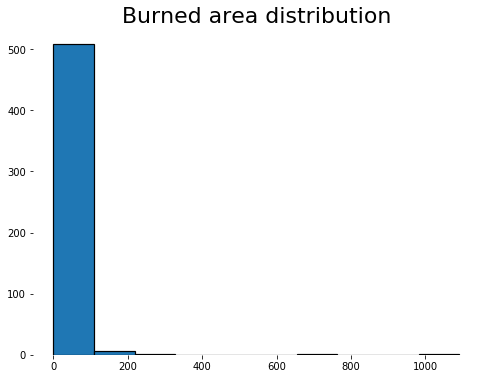

In [100]:
histogram_plot(area_values, title = "Burned area distribution")
plt.show()

### Percentage of dataset with 'burned area' > 0

In [101]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
        positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


## Gaining insights with learning models

### Spilliting the available data/Setting the initial parameters

In [102]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.2, random_state = 9)
mse_values = []
variance_score = []

### Printing the actual vs predicted values

In [103]:
def print_values(test, predicted):
    print("The actual output and the predicted output are:")
    
    for value in range(0, len(predicted_y)):
        print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

### Linear regression model

In [104]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.63897578  1.59124431  2.07931799  0.98231984 -0.18672877  0.09169618
 -0.02163921 -0.40553533  0.57061408 -0.39798641  1.18224976 -1.57179411]

Mean squared error:  2123.487162115886
Variance score: -0.00


### Decision tree model

In [105]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2325.4108387019232
Variance score: -0.10


### MLP model

In [106]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2099.235519928646
Variance score: 0.01


### SVM model

In [107]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2331.289178732077
Variance score: -0.10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [108]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  3083.0911249095216
Variance score: -0.46


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Bayesian ridge model

In [109]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2122.4221751865553
Variance score: -0.00


### Lasso model

In [110]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2126.066659189538
Variance score: -0.01


### Function for generating the graph

In [111]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

### Mean squared error graph

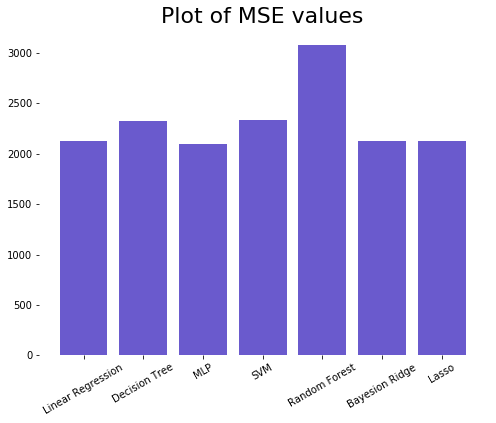

In [112]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

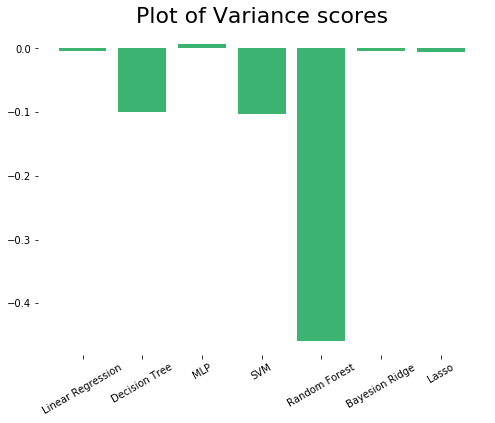

In [113]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Applying Log-Transformation to the 'burned area' variable

We can see that the errors in the prediction of burned areas from the given dataset is very high in the above mentioned model. A reason for this could be the high skewness of the 'Burned Area' variable is towards zero.

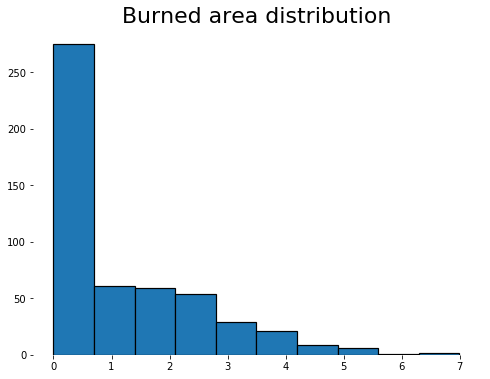

In [114]:
area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(area_values, title = "Burned area distribution")

## Applying learning models on the processed data

### Setting the initial parameters

In [115]:
mse_values = []
variance_score = []

### Linear regression model

In [116]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.63897578  1.59124431  2.07931799  0.98231984 -0.18672877  0.09169618
 -0.02163921 -0.40553533  0.57061408 -0.39798641  1.18224976 -1.57179411]

Mean squared error:  2123.487162115886
Variance score: -0.00


### Decision tree model

In [117]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  7415.151299519228
Variance score: -2.51


### MLP model

In [118]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,30,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2089.9495682250213
Variance score: 0.01


### SVM model

In [119]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2331.289178732077
Variance score: -0.10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [120]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2757.8060607005227
Variance score: -0.30


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Bayesian ridge model

In [121]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2122.4221751865553
Variance score: -0.00


### Lasso model

In [122]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2126.066659189538
Variance score: -0.01


### Mean squared error graph

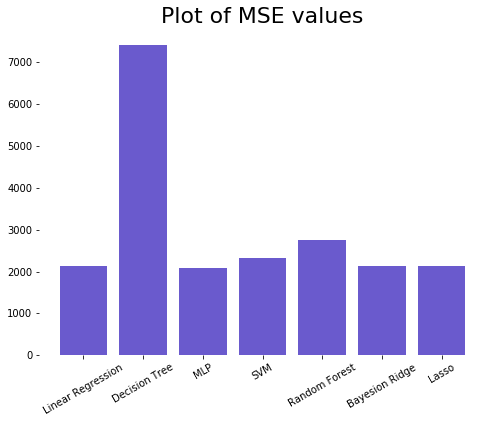

In [123]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

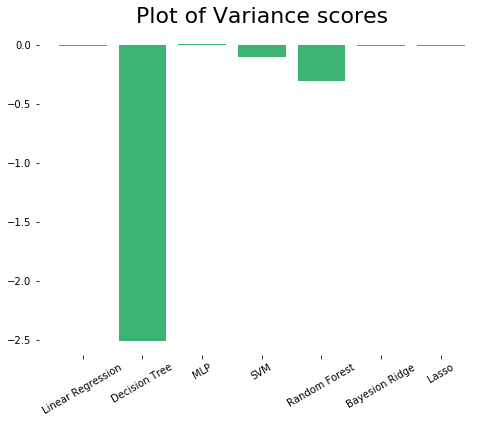

In [124]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Normalisation of all data

In [125]:
n_x_values = preprocessing.normalize([x_values])[0]
n_y_values = preprocessing.normalize([y_values])[0]

n_month_values = preprocessing.normalize([month_values])[0]
n_day_values = preprocessing.normalize([day_values])[0]

n_ffmc_values = preprocessing.normalize([ffmc_values])[0]
n_dmc_values = preprocessing.normalize([dmc_values])[0]
n_dc_values = preprocessing.normalize([dc_values])[0]
n_isi_values = preprocessing.normalize([isi_values])[0]

n_temp_values = preprocessing.normalize([temp_values])[0]
n_rh_values = preprocessing.normalize([rh_values])[0]
n_wind_values = preprocessing.normalize([wind_values])[0]
n_rain_values = preprocessing.normalize([rain_values])[0]

n_area_values = preprocessing.normalize([area_values])[0]
n_attribute_list = []

for index in range(0, len(n_x_values)):
    temp_list = []
    
    temp_list.append(n_x_values[index])
    temp_list.append(n_y_values[index])
    
    temp_list.append(n_month_values[index])
    temp_list.append(n_day_values[index])

    temp_list.append(n_ffmc_values[index])
    temp_list.append(n_dmc_values[index])
    temp_list.append(n_dc_values[index])
    temp_list.append(n_isi_values[index])

    temp_list.append(n_temp_values[index])
    temp_list.append(n_rh_values[index])
    temp_list.append(n_wind_values[index])
    temp_list.append(n_rain_values[index])
    
    n_attribute_list.append(temp_list)

## Applying learning models on the normalised data

### Setting the initial parameters

In [126]:
mse_values = []
variance_score = []

### Spilliting the available data

In [127]:
train_x, test_x, train_y, test_y = train_test_split(n_attribute_list, n_area_values, test_size=0.3, random_state = 9)

### Linear regression model

In [128]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 0.06062002  0.11191486  0.34063326  0.04497625  0.08314295  0.11997013
 -0.13438317 -0.12264177 -0.08720562 -0.30440979  0.16393813  0.02727977]

Mean squared error:  0.001426223498840591
Variance score: 0.00


### Decision tree model

In [129]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0026558492245959842
Variance score: -0.86


### MLP model

In [130]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.001478753904859213
Variance score: -0.03


### SVM model

In [131]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.004579753060572858
Variance score: -2.20


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random forest model

In [132]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean squared error:  0.0017925123983853308
Variance score: -0.25


### Bayesian ridge model

In [133]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0014432961907057092
Variance score: -0.01


### Lasso model

In [134]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0014437638154593492
Variance score: -0.01


## Visualising the results

### Mean squared error graph

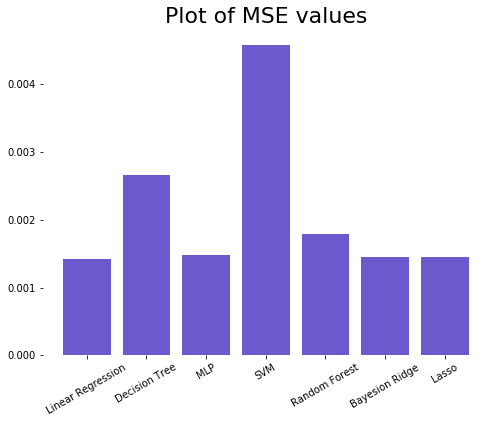

In [135]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

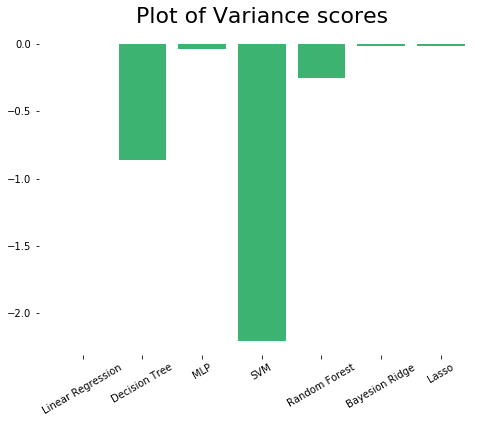

In [136]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

The next step is to try out binary classification for this problem.

## Converting the target values to binary classes

In [137]:
binary_area_values = []
count = 0

for value in area_values:
    if(value == 0):
        binary_area_values.append(0)
    else:
        binary_area_values.append(1)

## Gaining insights with classification algorithm

### Setting the initial parameters

In [138]:
accuracy_values = []

### Spilliting the available data

In [139]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, binary_area_values, test_size=0.15, random_state = 4)

### SGD model

In [140]:
sgd = linear_model.SGDClassifier()
sgd.fit(train_x, train_y)
predicted_y = sgd.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 50.0.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Decision tree model

In [141]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1]
The accuracy score is 61.53846153846154.


### Naive bayes model

In [142]:
naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)
predicted_y = naive_bayes.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0]
The accuracy score is 55.12820512820513.


### SVM model

In [143]:
svm_model = svm.SVC(kernel='linear', gamma=100)
svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 58.97435897435898.


### Random forest model

In [144]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1]
The accuracy score is 61.53846153846154.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Visualising the results

### Variance score graph

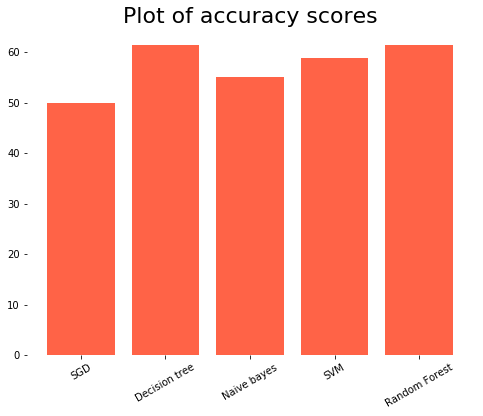

In [145]:
ticks = ["SGD", "Decision tree", "Naive bayes", "SVM", "Random Forest"]
generate_plot("Plot of accuracy scores", ticks, accuracy_values, 2)

## Artificial Neural Network - Implementation

In [146]:
train_x_a = np.array(train_x)
test_x_a = np.array(test_x)
test_y_a = np.array(test_y)
train_y_temp = np.array(train_y)

train_y_cl = []
for i in range(len(train_y)):
    if(train_y[i]>0):
        train_y_cl.append(1)
    else:
        train_y_cl.append(0)
train_y_cl = np.array(train_y_cl)

print("Length of Training data is : "+str(len(train_x_a))+" and Test data is : " + str(len(test_x_a)))

Length of Training data is : 439 and Test data is : 78


### Creating the Keras neural network model

In [147]:
model = Sequential()
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(1, activation='sigmoid'))

### Training, Fitting and Evaluating the model

In [148]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(train_x_a,train_y_cl, epochs=100, batch_size=8)

# Evaluate the model
scores = model.evaluate(test_x_a, test_y_a)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
439/439 [==============================] - 1s 3ms/step - loss: 0.8011 - acc: 0.5216
Epoch 2/100
439/439 [==============================] - 0s 216us/step - loss: 0.7181 - acc: 0.5216
Epoch 3/100
439/439 [==============================] - 0s 218us/step - loss: 0.6965 - acc: 0.5262
Epoch 4/100
439/439 [==============================] - 0s 332us/step - loss: 0.6891 - acc: 0.5626
Epoch 5/100
439/439 [==============================] - 0s 341us/step - loss: 0.6901 - acc: 0.5513
Epoch 6/100
439/439 [==============================] - 0s 198us/step - loss: 0.6824 - acc: 0.5695
Epoch 7/100
439/439 [==============================] - 0s 202us/step - loss: 0.6801 - acc: 0.5649
Epoch 8/100
439/439 [==============================] - 0s 282us/step - loss: 0.6785 - acc: 0.5649
Epoch 9/100
439/439 [==============================] - 0s 329us/step - loss: 0.6783 - acc: 0.5649
Epoch 10/100
439/439 [==============================] - 0s 291us/step - loss: 0.6747 - acc: 0.5786
Epoch 11/100
439/439 

## Artificial Neural Network - Regression Model

### Defining base model

In [149]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

### Creating sequential model

In [150]:
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

### Compiling & training the model

In [151]:
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# train model
history = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=4, verbose=1)

Epoch 1/150
439/439 [==============================] - 1s 2ms/step - loss: 1.1029
Epoch 2/150
439/439 [==============================] - 0s 429us/step - loss: 0.2569
Epoch 3/150
439/439 [==============================] - 0s 343us/step - loss: 0.2672
Epoch 4/150
439/439 [==============================] - 0s 441us/step - loss: 0.2600
Epoch 5/150
439/439 [==============================] - 0s 413us/step - loss: 0.2705
Epoch 6/150
439/439 [==============================] - 0s 538us/step - loss: 0.2709
Epoch 7/150
439/439 [==============================] - 0s 448us/step - loss: 0.2595
Epoch 8/150
439/439 [==============================] - 0s 277us/step - loss: 0.2707
Epoch 9/150
439/439 [==============================] - 0s 293us/step - loss: 0.2637
Epoch 10/150
439/439 [==============================] - 0s 388us/step - loss: 0.2854
Epoch 11/150
439/439 [==============================] - 0s 432us/step - loss: 0.2571
Epoch 12/150
439/439 [==============================] - 0s 463us/step - loss

439/439 [==============================] - 0s 300us/step - loss: 0.2373
Epoch 98/150
439/439 [==============================] - 0s 298us/step - loss: 0.2370
Epoch 99/150
439/439 [==============================] - 0s 334us/step - loss: 0.2323
Epoch 100/150
439/439 [==============================] - 0s 541us/step - loss: 0.2364
Epoch 101/150
439/439 [==============================] - 0s 534us/step - loss: 0.2366
Epoch 102/150
439/439 [==============================] - 0s 366us/step - loss: 0.2280
Epoch 103/150
439/439 [==============================] - 0s 366us/step - loss: 0.2339
Epoch 104/150
439/439 [==============================] - 0s 352us/step - loss: 0.2392
Epoch 105/150
439/439 [==============================] - 0s 388us/step - loss: 0.2381
Epoch 106/150
439/439 [==============================] - 0s 470us/step - loss: 0.2362
Epoch 107/150
439/439 [==============================] - 0s 486us/step - loss: 0.2319
Epoch 108/150
439/439 [==============================] - 0s 327us/step

### Make Predictions

In [152]:
predicted = model.predict( np.array(test_x),batch_size=None, verbose=0, steps=1)

### Evaluate model with standardized dataset

In [153]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=1)

In [154]:
seed = 14
np.random.seed(seed)

### Model Validation - 10 fold validation

In [155]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, np.array(test_x), np.array(test_y), cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/1
8/8 [==============================] - 0s 25ms/step
Epoch 1/1
8/8 [==============================] - 0s 26ms/step
Epoch 1/1
8/8 [==============================] - 0s 28ms/step
Epoch 1/1
8/8 [==============================] - 0s 29ms/step
Epoch 1/1
8/8 [==============================] - 0s 30ms/step
Epoch 1/1
8/8 [==============================] - 0s 35ms/step
Epoch 1/1
8/8 [==============================] - 0s 48ms/step
Epoch 1/1
8/8 [==============================] - 0s 36ms/step
Epoch 1/1
7/7 [==============================] - 0s 45ms/step
Epoch 1/1
7/7 [==============================] - 0s 48ms/step
Results: -3.72 (7.57) MSE


### Checking the MSE and variance scores

In [156]:
print("Mean squared error: ", mean_squared_error(test_y, predicted))
print('Variance score: %.2f' % r2_score(test_y, predicted))

Mean squared error:  0.24274639000191237
Variance score: 0.03
